# Making a Malware Generator 

# Abstract:

Bottom Line Up Front: Detect Malware with 95% accuracy using a Random Forrest.

This notebook investigates the development of a descriptive Random Forest predictive model for detecting malware attempting to access ports in cybersecurity data. The research question addressed is whether such a model can be constructed effectively. The null hypothesis posits that the Random Forest model lacks significant classification power and performs no better than random guessing, while the alternative hypothesis asserts the opposite. Leveraging an open-source dataset of Counter Threat Unit (CTU) conn.log scans from Kaggle, this study focuses on a subset of variables to predict malware activity. By employing Random Forest regression tests, the research aims to enhance cyber defense strategies, optimizing investment in port security measures. Methodologically, the study employs various data analytics tools and techniques, including KDE plots, Pearson's correlation matrix, and Random Forest regression tests implemented in Python using scikit-learn. The project outcomes include the development of a descriptive statistical model, exploratory visualizations, and a better understanding of malicious request patterns. Findings indicate that the Random Forest model exhibits significant classification power, outperforming random guessing in detecting malware, as evidenced by high accuracy scores and performance metrics. These results underscore the potential of Random Forest algorithms in cybersecurity applications, paving the way for further research and exploration in this domain.

Null Hypothesis (H0): The Random Forest model has no significant predictive power or classification power, and its performance is not better than random guessing.

Alternative Hypothesis (H1): The Random Forest model has significant predictive power or classification power, and its performance is better than random guessing.

The datasets can be accessed at one of the two following links:
https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv

Available to the public via Kaggle.com, meaning that the dataset may be limiting in accuracy and completeness. To get the unabridged copy, check out this link here:

https://www.stratosphereips.org/datasets-iot23

The study follows an 8 step process for data cleaning and exploration. 


In [1]:
#-- Importing liberaries --#

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor 
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

2024-03-02 16:59:14.491217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Step 1: Data Cleaning and Exploration 

In [2]:
#-- Importing the dataset --#
df_raw = pd.read_csv('/Users/michaelsegaline/Desktop/Malware detector/CTU-IoT-Malware-Capture-1-1conn.log.labeled.parsed.csv')

In [56]:
#-- Inpecting the column names --#
df_raw.head(10)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,6478,18768,501746,23,tcp,6,22,3,180,0,0,1
1,6478,23547,496872,23,tcp,6,22,1,60,0,0,1
2,6478,8350,36215,23,tcp,6,22,1,60,0,0,1
3,6478,28145,88035,23,tcp,6,22,3,180,0,0,1
4,6478,11548,576062,23,tcp,6,22,1,60,0,0,1
5,6478,17488,60788,23,tcp,6,22,1,60,0,0,1
6,6478,1498,132673,49560,tcp,6,22,3,180,0,0,0
7,6478,2095,126116,21288,tcp,6,22,1,60,0,0,0
8,6478,25767,214588,23,tcp,6,22,1,60,0,0,1
9,6478,11096,582305,8080,tcp,6,22,1,60,0,0,1


In [57]:
#-- Getting descriptive statistics --#
df_raw.describe()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
count,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06
mean,6.494012e+03,1.253359e+04,2.945166e+05,1.609771e+04,5.912600e+00,1.647861e+01,1.496242e+00,8.114562e+01,1.424647e-01,9.049184e+00,5.347946e-01
std,5.552642e+02,6.702184e+03,1.735689e+05,1.956280e+04,9.244759e-01,1.939771e+01,1.741176e+00,9.473090e+01,1.850414e+00,1.196776e+02,4.987881e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.478000e+03,1.097700e+04,1.446810e+05,2.300000e+01,6.000000e+00,2.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.478000e+03,1.101000e+04,2.798115e+05,8.080000e+03,6.000000e+00,2.200000e+01,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.478000e+03,1.605900e+04,4.506590e+05,2.818025e+04,6.000000e+00,2.200000e+01,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,1.500300e+04,2.824200e+04,5.971060e+05,6.553500e+04,1.000000e+01,1.260000e+02,6.000000e+01,2.990000e+03,7.500000e+01,9.415000e+03,1.000000e+00


In [3]:
#-- Now dropping all of the rows with null or missing values --#
df_raw.dropna()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.100.103,51524,65.127.233.163,23,tcp,S0,S,3,180,0,0,Malicious
1,192.168.100.103,56305,63.150.16.171,23,tcp,S0,S,1,60,0,0,Malicious
2,192.168.100.103,41101,111.40.23.49,23,tcp,S0,S,1,60,0,0,Malicious
3,192.168.100.103,60905,131.174.215.147,23,tcp,S0,S,3,180,0,0,Malicious
4,192.168.100.103,44301,91.42.47.63,23,tcp,S0,S,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,192.168.100.103,43763,16.219.83.137,64906,udp,S0,D,1,40,0,0,Benign
1008744,192.168.100.103,43763,100.57.245.196,39435,udp,S0,D,1,40,0,0,Benign
1008745,192.168.100.103,43763,249.99.119.9,26169,udp,S0,D,1,40,0,0,Benign
1008746,192.168.100.103,43763,205.103.167.192,18241,udp,S0,D,1,40,0,0,Benign


In [58]:
#-- Loop through each column and calculate percentage of missing rows --#
for column in df_raw.columns:
    missing_count = df_raw[column].isnull().sum()
    missing_percentage = missing_count / len(df_raw) * 100
    print(f"Column '{column}' has {missing_count} missing rows ({missing_percentage:.2f}%)")

Column 'id.orig_h' has 0 missing rows (0.00%)
Column 'id.orig_p' has 0 missing rows (0.00%)
Column 'id.resp_h' has 0 missing rows (0.00%)
Column 'id.resp_p' has 0 missing rows (0.00%)
Column 'proto' has 0 missing rows (0.00%)
Column 'conn_state' has 0 missing rows (0.00%)
Column 'history' has 0 missing rows (0.00%)
Column 'orig_pkts' has 0 missing rows (0.00%)
Column 'orig_ip_bytes' has 0 missing rows (0.00%)
Column 'resp_pkts' has 0 missing rows (0.00%)
Column 'resp_ip_bytes' has 0 missing rows (0.00%)
Column 'label' has 0 missing rows (0.00%)


In [59]:
#-- Get the data types of each column --#
dtypes = df_raw.dtypes

#-- Print the data types --#
print(dtypes)

id.orig_h         int64
id.orig_p         int64
id.resp_h         int64
id.resp_p         int64
proto            object
conn_state        int64
history           int64
orig_pkts         int64
orig_ip_bytes     int64
resp_pkts         int64
resp_ip_bytes     int64
label             int64
dtype: object


Now converting categorical variables to numeric with LabelEncoder()

In [4]:
#-- Now label encoding 'id.orig_h'and repeat for the following labels in the corresponding cells below --#
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_raw['id.orig_h']= label_encoder.fit_transform(df_raw['id.orig_h'])
df_raw['id.orig_h'].nunique()

15004

In [5]:
df_raw['id.orig_p'].nunique()

28243

In [60]:
df_raw['history']= label_encoder.fit_transform(df_raw['history'])
df_raw['history'].nunique()

127

In [7]:
#-- Once encoded 'history' contains missing values; Therefore the dropna() function must be called again --#
df_raw.dropna(subset=['history'], inplace=True)

In [8]:
df_raw['label']= label_encoder.fit_transform(df_raw['label'])
df_raw.head()


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,6478,51524,65.127.233.163,23,tcp,S0,22,3,180,0,0,1
1,6478,56305,63.150.16.171,23,tcp,S0,22,1,60,0,0,1
2,6478,41101,111.40.23.49,23,tcp,S0,22,1,60,0,0,1
3,6478,60905,131.174.215.147,23,tcp,S0,22,3,180,0,0,1
4,6478,44301,91.42.47.63,23,tcp,S0,22,1,60,0,0,1


In [9]:
 df_raw['id.orig_h']= label_encoder.fit_transform(df_raw['id.orig_h'])
# types of timestamp
df_raw['id.orig_h'].nunique()

15004

In [10]:
df_raw['id.resp_h']= label_encoder.fit_transform(df_raw['id.resp_h'])
df_raw['id.resp_h'].nunique()

597107

In [11]:
df_raw['id.orig_p']= label_encoder.fit_transform(df_raw['id.orig_p'])
df_raw['id.orig_p'].nunique()

28243

In [12]:
df_raw['conn_state']= label_encoder.fit_transform(df_raw['conn_state'])
df_raw['conn_state'].nunique()

11

In [13]:
#-- Now using get_dummies() to label encode the remaining variables of 'proto' and 'conn_state' --#
df = pd.get_dummies(df_raw, drop_first =True)

In [14]:
df.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_tcp,proto_udp
0,6478,18768,501746,23,6,22,3,180,0,0,1,1,0
1,6478,23547,496872,23,6,22,1,60,0,0,1,1,0
2,6478,8350,36215,23,6,22,1,60,0,0,1,1,0
3,6478,28145,88035,23,6,22,3,180,0,0,1,1,0
4,6478,11548,576062,23,6,22,1,60,0,0,1,1,0


# Step 2: Variable Exploration via Visualization

The first graph below is a correlation matrix aka(Pearson's Correlation matrix) or Heatmap. The correlation matrix visualizes the correlation coefficient, positive or negative, between the target variables ('label' in this case). 

The correlation matrix is a Data Miner's gold pan; It picks out signal from the noise and exposes other hidden associations between variables. The trick is to remove all variables (and variable derivatives) that have a high association with "multi-collinearity' with the target variable; 'label' in this case.

Additionally, the associations between variables can sometimes be mathematically manipulated to create even better predictive variables, AKA "Feature Engineering".


<AxesSubplot:title={'center':'Pearson Correlation of IT Contract Features'}>

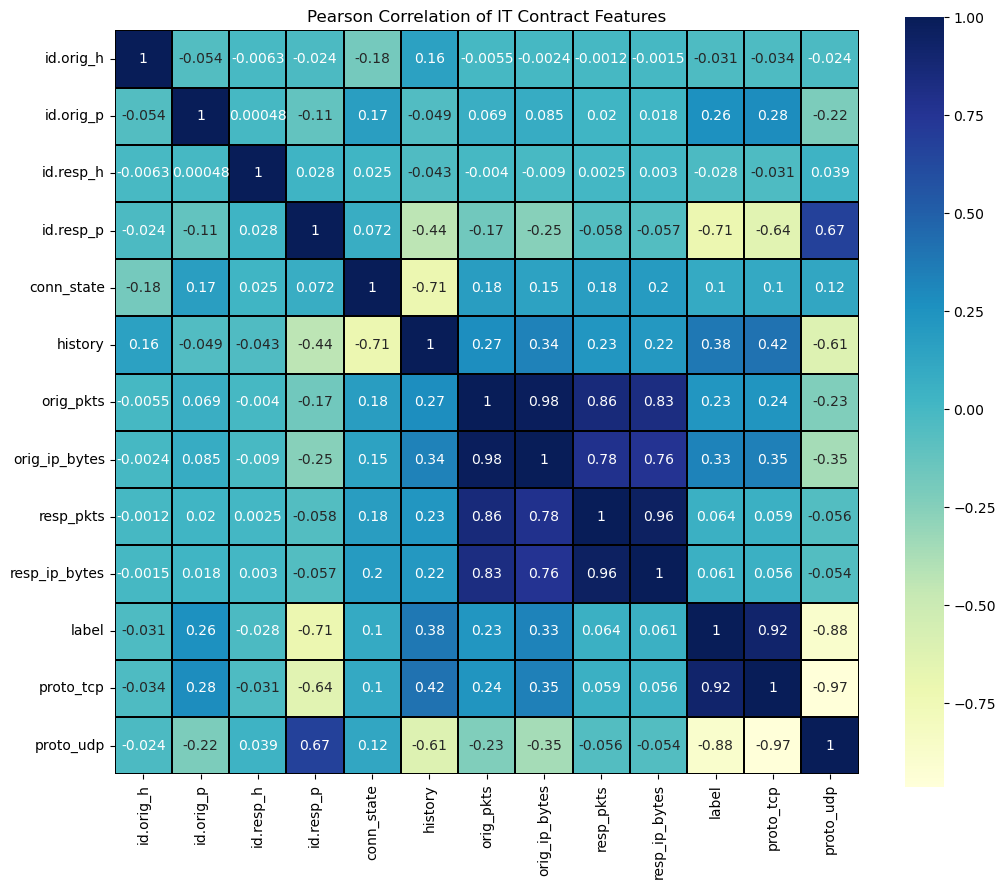

In [15]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of IT Contract Features')
 
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

A correlation coefficient of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

Thresholds and Cutoffs: Setting specific correlation coefficient thresholds for removal is not generally recommended as it can be overly simplistic and neglect other factors.

Machine Learning is an Art: The process of model development and feature selection involves an iterative process of experimentation, evaluation, and refinement based on your specific data and problem. The art is to find the germane variables that will not cause the model to overfit and make more accurate predictions of unseen data. 

The additional art is using only the variables necessary and no more; More variables will just add more noise to the model, reach a plateau of accuracy, then descend in accuracy, due to noise. Variable reduction increases computation.


In [16]:
#-- Creating a list of column names to drop --#
columns_to_drop = ['proto_tcp', 'proto_udp','id.resp_p']

#-- Drop the columns using list comprehension to the final converted dataset --#
df = df.drop(columns=columns_to_drop)


# Step 3: Univariate visualization exploration

Now going into Univariate exploration with density distribution plot or KDE. 

An important step, the visuals generate the distribution shapes, indicating the parametric of non-parametric nature of the variables. If all variables look Gaussian ('bell-shaped' or not skewed) then a Shapiro-Wilk test will be used to test for "normality". Else, one or more of the variables is non-parametric, forcing the use of non-parametric machine learning models.

The above graph indicates multi-collinearity between the target variable "label" and the variables of 'proto_tcp'(92%) and 'id.resp_p'(-71%); They will be removed because they caused the model to overfit due to high- multicollinearity.


<AxesSubplot:xlabel='history', ylabel='Density'>

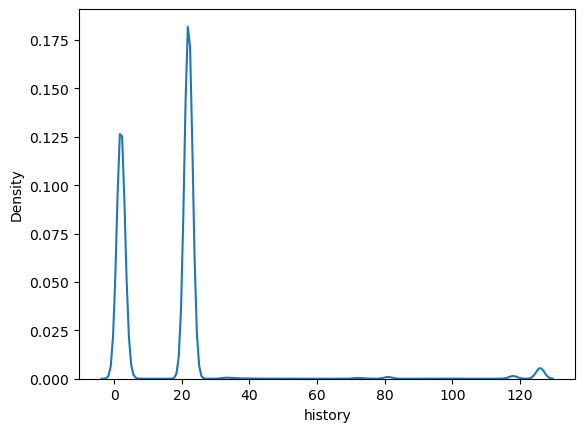

In [20]:
#-- Plotting the distrobtion of 'history' --#
sns.kdeplot(df['history'])


<AxesSubplot:xlabel='id.orig_p', ylabel='Density'>

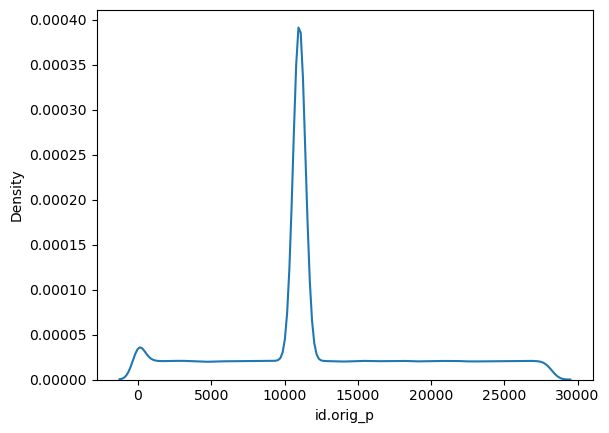

In [73]:
#-- Plotting the distrobtion of 'id.orig_p' --#
sns.kdeplot(df['id.orig_p'])


<AxesSubplot:xlabel='orig_ip_bytes', ylabel='Density'>

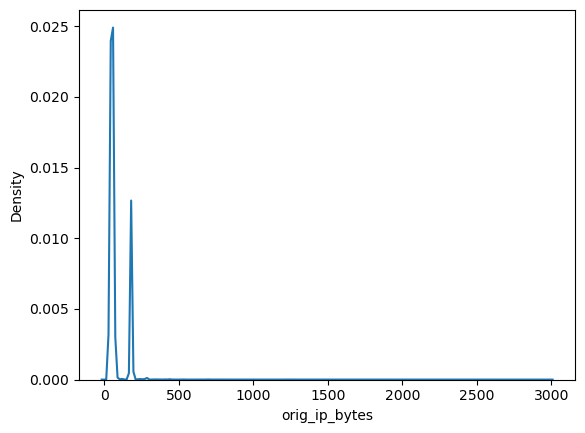

In [22]:
#-- Plotting the distrobtion of 'orig_ip_bytes' --#
sns.kdeplot(df['orig_ip_bytes'])


<AxesSubplot:xlabel='label', ylabel='Density'>

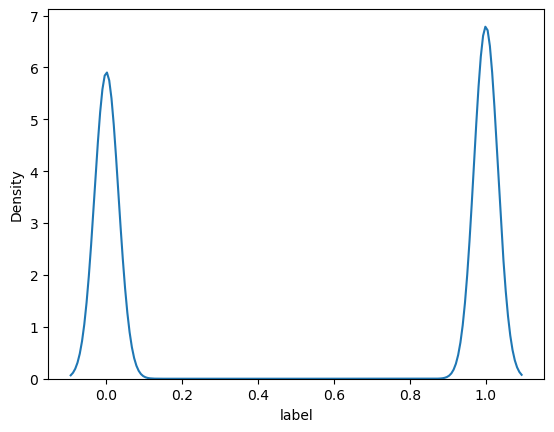

In [46]:
#-- Plotting the distrobtion of 'label' --#
sns.kdeplot(df['label'])


# Step 4: Asses the parametric nature of the variables.

For the above univariate visualizations, one or more of the variables is non-parametric in nature; Eliminating the need for the Shapiro-Wilk test and coercing the testing to non-parametric models only.

The below is a final verification via correlation matrix that all highly correlated variables have been removed. 

<AxesSubplot:title={'center':'Pearson Correlation of IT Contract Features'}>

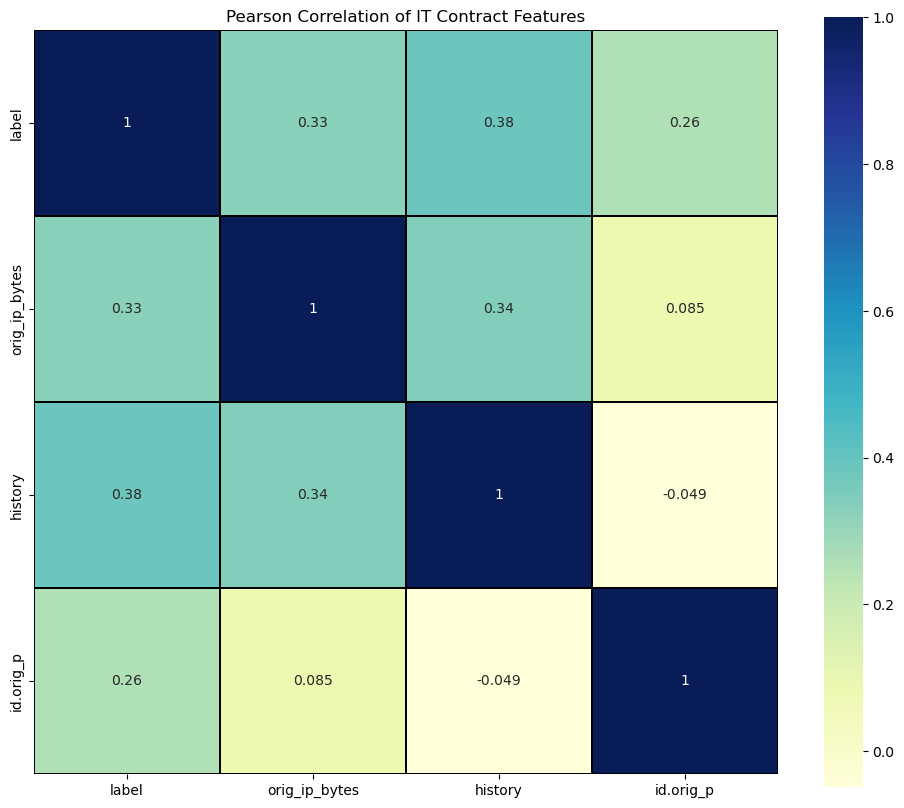

In [47]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of IT Contract Features')
 
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Step 5 Exploratory Analysis via Unsupervised Machine Learning 

The first Machine Learning model used is Principal Component Analysis (PCA). PCA helps determine the necessary number of variables for the model contingent upon the amount of variance contained in the variables. PCA is a dimensionality reduction technique that reduces variables to Principal Components. Reducing the variables to eigen vectors then eigen values.

Next, the Principal Components are explored via KMeans Cluster Analysis, another unsupervised machine learning technique.


In [48]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [49]:
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

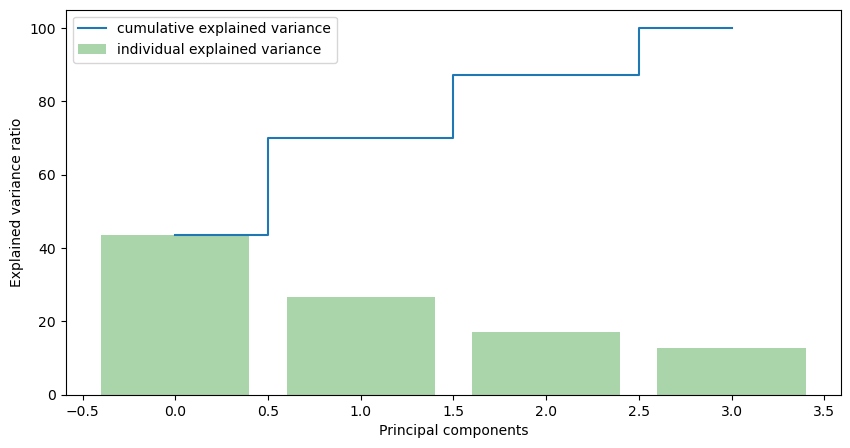

In [50]:
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'K-means with PCA clustering ')

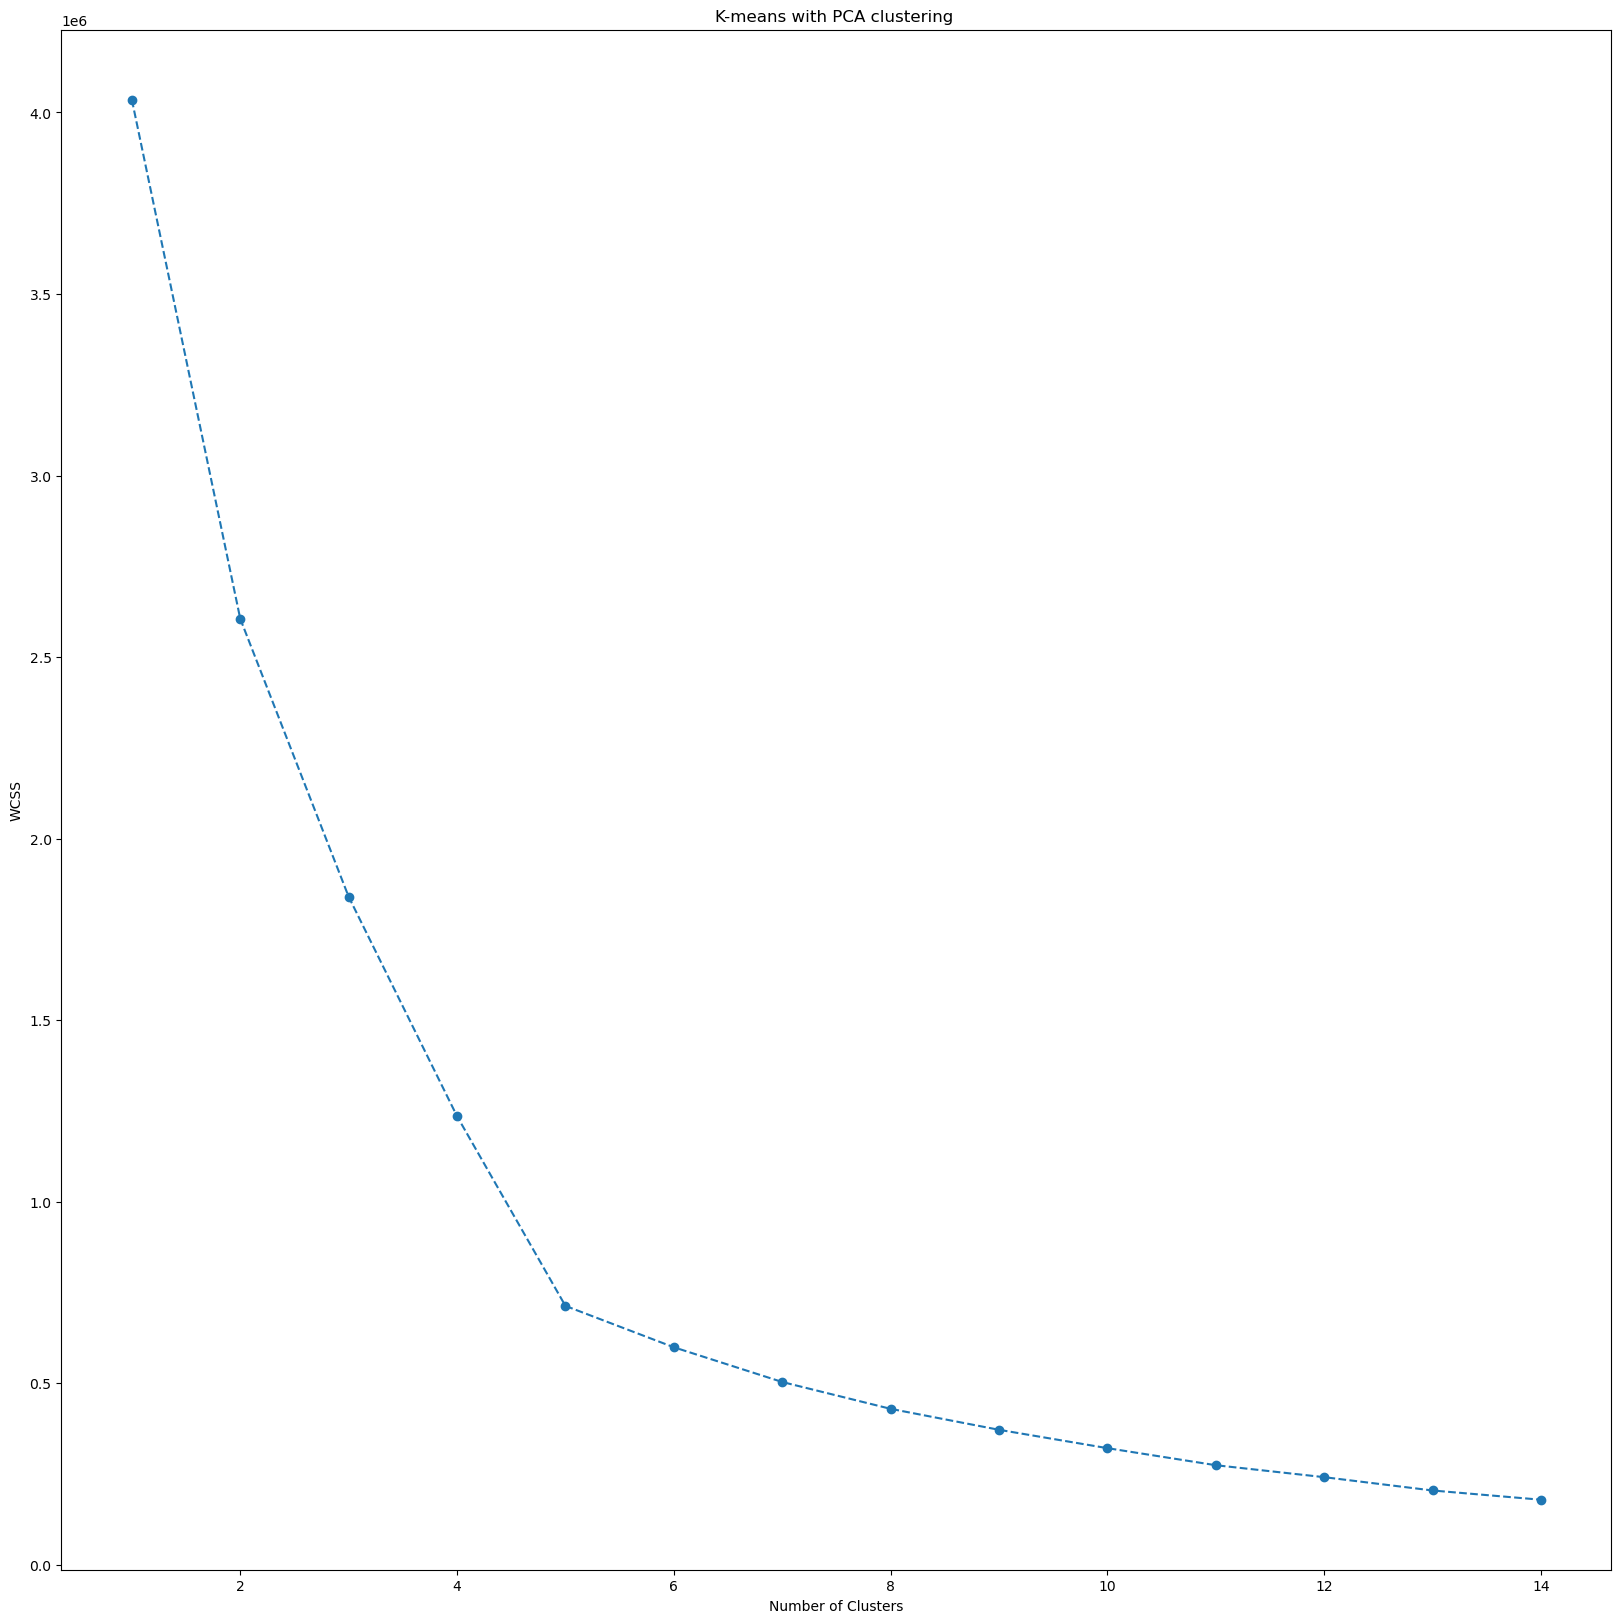

In [51]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

According to the above graph, the Kaiser Criterion, and 'elbow method', the optimal number of variables / clusters is around 5. 

Step 5.5: KMean Cluster Analysis, exploring the data in reduced dimensional space.


# See what the machines see with KMeans.

Imagine you are in a spaceship, and you are approaching a galaxy from a distance and you ask your ship's auto-navigator to show you the entire galaxy as one grouping. The auto-navigator will move the spaceship to reorient in space, displaying to you the entire galaxy as one group. For each cluster number, the spaceship reorients in space / time, most effectively displaying to you the different star color groups in space-time.

Exploring Principal components in this space can reveal patterns that can be better understood or exploited by other machine learning models.


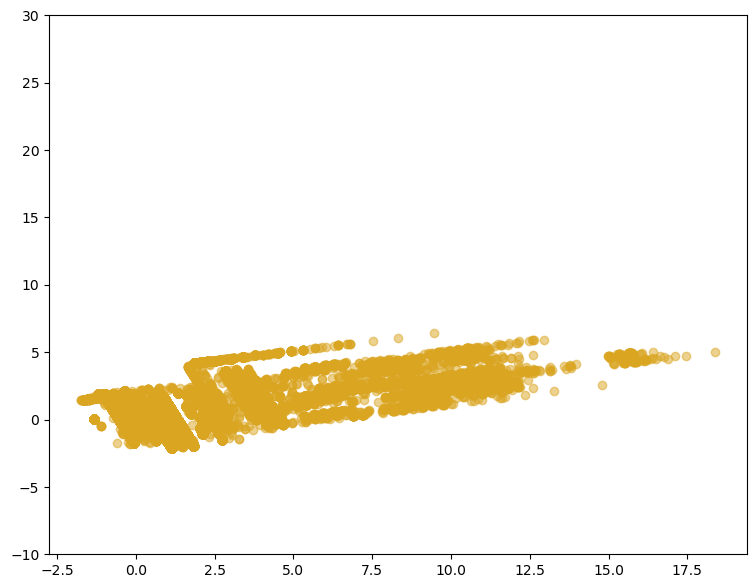

In [53]:

#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=4)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

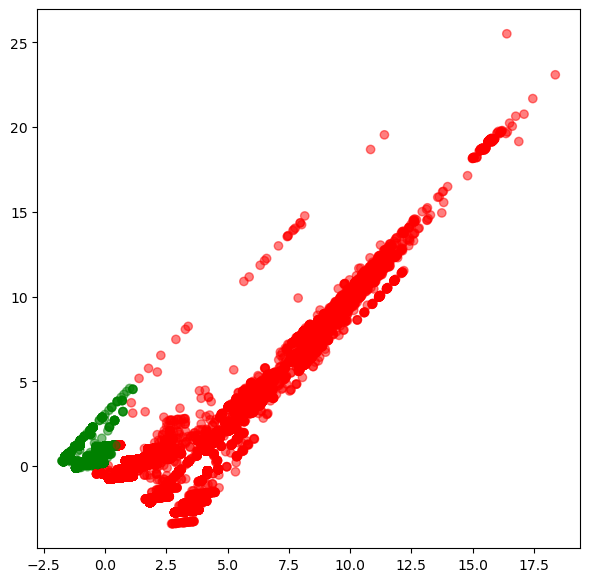

In [54]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

plt.show()

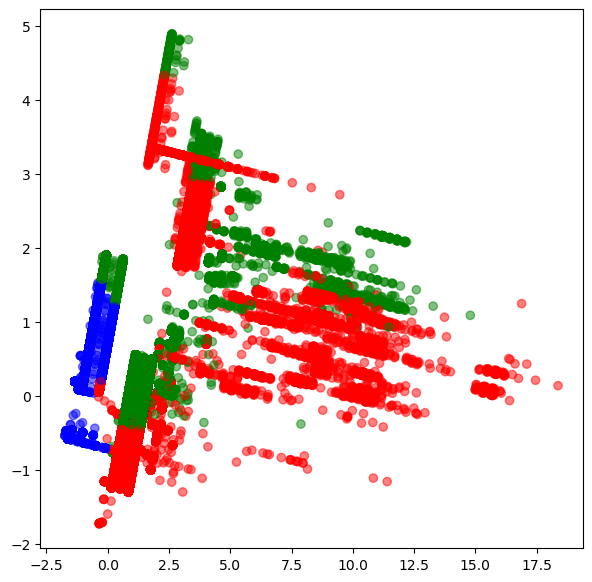

In [55]:
#-- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

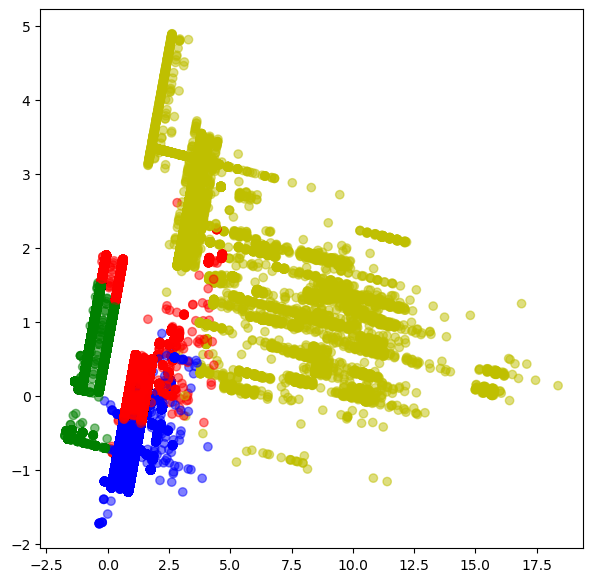

In [61]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

# Step 6: Creating the Random Forrest model. 

Below is a list of data frames of variables explored to find the optimal plateu then reduce back to the optimal maxima of dependent variables contingent on accuracy.

In [25]:
df = df[['label','orig_ip_bytes','history','id.orig_p']] #- Yeilded r2 82% MSE of 0.04, AUC of 97% ||xgboost score r2:.838 MSE 0.04 AUC .95
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p']] -Yeilded r2 82% MSE:0.04, AUC:97%
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p','conn_state']] R2 82 MSE:0.04, AUC:97%
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p','conn_state','resp_pkts']] R2 82 MSE:0.04, AUC:97%
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p','conn_state','resp_pkts','resp_ip_bytes']]  R2 82 MSE:0.04, AUC:97%
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p','conn_state','resp_pkts','resp_ip_bytes','id.orig_h']] R2 82 MSE:0.04, AUC:97%
#df = df[['label','orig_ip_bytes','orig_pkts','history','id.orig_p','conn_state','resp_pkts','resp_ip_bytes','id.resp_p']] (0verfit) R2 99993% MSE 1.72 AUC: 1
#df = df[['label','orig_ip_bytes','history']] R2:.839 MSE:0.03 AUC: 95.44%  

# Now running Random Forrest Regressor to predict "label"

In [34]:
#-- Sperating the dataframe into two 'X' = all variables minus the target variable --#
#-- 'y' is the target variable --#
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

In [35]:
#-- Splitting the two datasets in 4 sets. Reserving 20% for testing 80% for training --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#-- Instanitating the model --#
model = RandomForestRegressor()

In [37]:
#-- Fitting the model to the training data --#
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
#-- Generating model predictions on the test set --#
predictions = model.predict(X_test)

# Step 7:  Model Evaluation

The following will analysis gives the R2, Mean Squared Error, and Reciever Operator Characteristic Area Under the Curve ROC_AUC score. Moreover a visualization of the Random Forrest. 

In [66]:
#-- Calling evaluation metrics for model scoring --#
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Mean Squared Error: 0.043133169817610506
R-squared: 0.8266269715569916
Accuracy: 0.9538884758364312


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

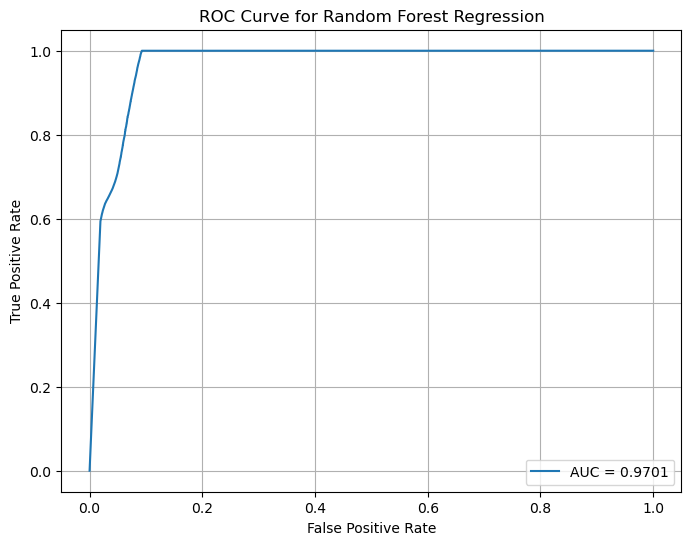

In [41]:
# Get predictions for the test data
y_pred = model.predict(X_test)

# Calculate ROC AUC score
auc = roc_auc_score(y_test, y_pred)

# False positive rate (FPR) and True positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Below is a visualization of the Random Forrest model

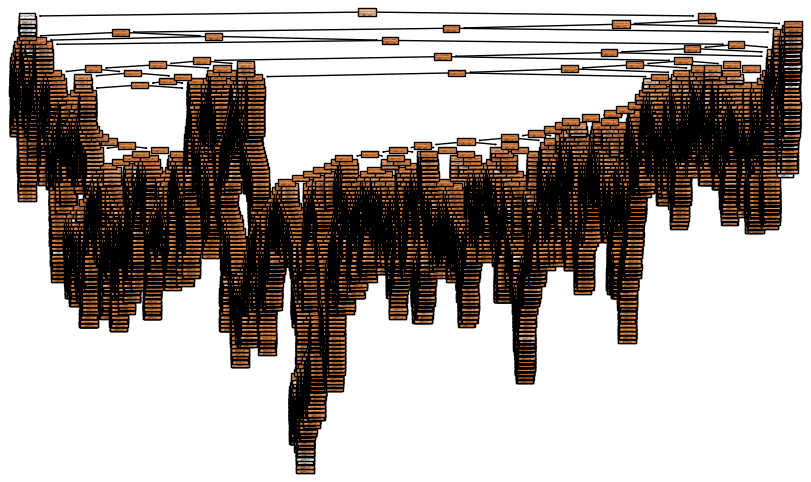

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model.estimators_[0], feature_names=['label','orig_ip_bytes','history','id.orig_p'], filled=True)
plt.show()

# Now Running Random Forrest Classifier

In [71]:
# Instantiate the Random Forest Classifier
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict labels for the testing data
y_pred2 = clf.predict(X_test)

# Evaluate the performance of the classifier
# For example, you can use accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9537992565055762


In [72]:
# Compute R-squared (R2)
r2 = r2_score(y_test, y_pred2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2): 0.8142969123341233
Mean Absolute Error (MAE): 0.04611152416356877


# Step 8: Summarize the Findings 

In final analysis, we reject the Null Hypothesis (HO) in favor of the Alternative Hypothesis (H1): The Random Forest model has significant predictive / classification power, and its performance is better than random guessing.
After cleaning and exploration, all variables with high-multicollinearity with the target variable were removed. The variables were displayed in density distribution charts and verified via the correlation matrix. Also, the distributions of one or more of the variables was non-parametric, justifying the use the ensemble methods. 
Both versions of Random Forrest tested approximately the same. While the first model's Mean Squared Error: 0.043, R-squared: 0.826, Area Under the Curve (AUC)is 97%, total Accuracy: 0.953; Correspondingly, the Classification model yielded an R-squared (R2): 0.814, Mean Absolute Error (MAE): 0.046. In general, the R2 score should be as close to 1 as possible however, have an MEA close to '0', and an AUC of minimum 95%. The following precision scores indicate that the Random Forrest model should be able to generalize well on unseen data. 
Different data sets should be compiled for additional testing. Moreover, other variables can be engineered and explored from the conn.log data. While, stated models outputted a high correctness, there are numerous non-parametric machine learning models that can be explored with the data. 

This concludes the initial big data investigation for the conn.log in the scientific exploration Security Information Event Management (SIEM) logs.

# Bottom Line: Detect Malware with 95% accuracy using a Random Forrest.

